# Dog Breed Dataset EDA

In [2]:
%matplotlib inline

In [ ]:
# !conda install pillow

In [9]:
import os
import numpy as np
import pandas as pd
import PIL # !conda install pillow
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(55)

In [6]:
def load_batch(dataset_df, batch_size = 25):
    batch_df = dataset_df.loc[np.random.permutation(
        np.arange(0, len(dataset_df))) [:batch_size], :]
    return batch_df

In [15]:
from PIL import Image
def plot_batch(images_df, grid_width, grid_height, im_scale_x, im_scale_y):
    f, ax = plt.subplots(grid_width, grid_height)
    f.set_size_inches(12, 12)
    
    img_idx = 0
    for i in range(0, grid_width):
        for j in range(0, grid_height):
            ax[i][j].axis('off')
            ax[i][j].set_title(images_df.iloc[img_idx]['breed'][:10])
            im = Image.fromarray(
                plt.imread(
                    DATASET_PATH + images_df.iloc[img_idx]['id'] + '.jpg'))
            size = (im_scale_x, im_scale_y)
            ax[i][j].imshow(np.array(im.resize(size, PIL.Image.BICUBIC)))
            img_idx += 1
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)       

## Load Dataset Params

In [1]:
DATASET_PATH = r'dog-breed-identification/train/'
LABEL_PATH = r'dog-breed-identification/labels.csv'

In [11]:
dataset_df = pd.read_csv(LABEL_PATH)
dataset_df.shape

(10222, 2)

In [12]:
dataset_df.head(2)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo


## Visualize a Sample Set

In [13]:
batch_df = load_batch(dataset_df, batch_size=36)

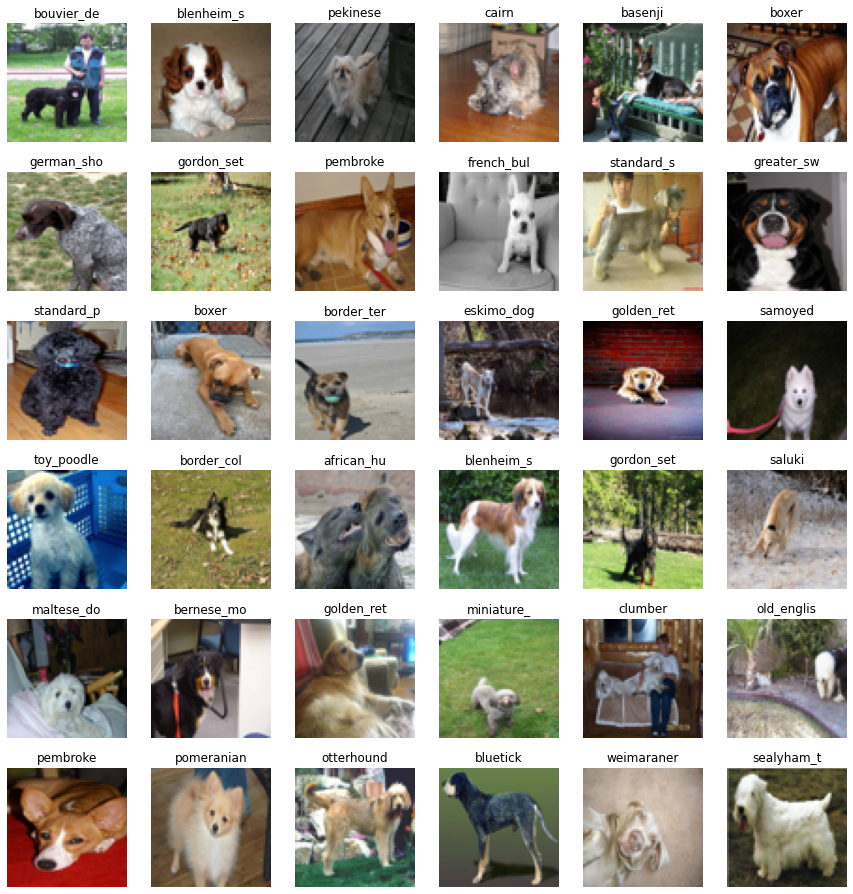

In [16]:
plot_batch(batch_df, grid_width=6, grid_height=6, im_scale_x=64, im_scale_y=64)

## Analyze Image Dimmensions

In [17]:
file_list = os.listdir(DATASET_PATH)
file_dimension_list = np.asarray([
    plt.imread(DATASET_PATH + file).shape for file in file_list
])
shape_df = pd.DataFrame(file_dimension_list, columns=['width', 'height', 'channel'])

In [18]:
shape_df.describe()

,width,height,channel
count,10222.000000,10222.00000,10222.0
mean,386.747212,443.33154,3.0
std,130.068327,152.42012,0.0
min,102.000000,97.00000,3.0
25%,333.000000,360.00000,3.0
50%,375.000000,500.00000,3.0
75%,452.000000,500.00000,3.0
max,2562.000000,3264.00000,3.0


## Shape Distribution

<AxesSubplot:>

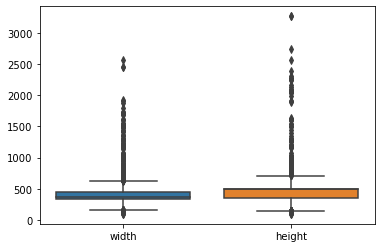

In [29]:
sns.boxplot(orient='v', data=shape_df[['width', 'height']])

## Scatter Plot

Text(0, 0.5, 'height')

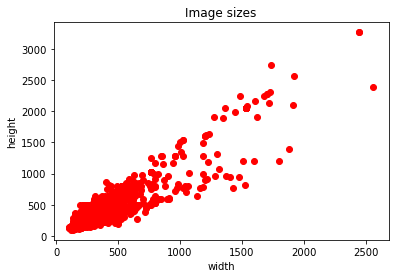

In [30]:
plt.plot(file_dimension_list[:, 0], file_dimension_list[:, 1], 'ro')
plt.title('Image sizes')
plt.xlabel('width')
plt.ylabel('height')

## Class (Breed) Distribution

In [33]:
dataset_df['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

<AxesSubplot:title={'center':'Breeds with Highest Counts'}>

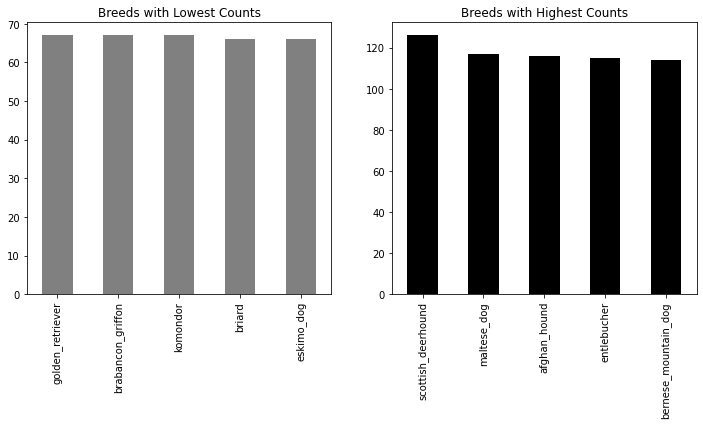

In [31]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 2, 1)
dataset_df.breed.value_counts().tail().plot(kind='bar', ax=ax1, color='gray',
                                          title='Breeds with Lowest Counts')

ax2 = fig.add_subplot(1, 2, 2)
dataset_df.breed.value_counts().head().plot(kind='bar', ax=ax2, color='black',
                                           title='Breeds with Highest Counts')

## Understand impact of resizing

In [34]:
IMG_INDEX = 100

In [35]:
DATASET_PATH + file_list[IMG_INDEX]

'dog-breed-identification/train/025d903b457b865fd29424916e42fbc2.jpg'

Text(0.5, 1.0, 'Original Image')

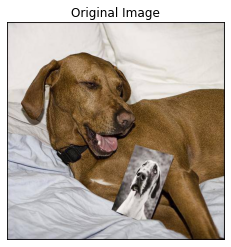

In [38]:
plt.figure(figsize=(10, 4))
img = plt.imshow(plt.imread(DATASET_PATH + file_list[IMG_INDEX]))
img.set_cmap('hot')
plt.axis('off')
plt.title('Original Image')

In [39]:
scale_size = [160, 80, 40, 20]

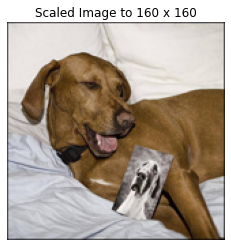

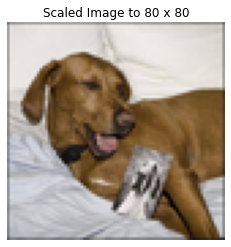

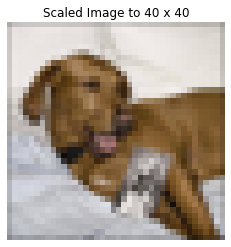

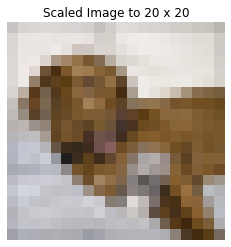

In [41]:
for scaler in scale_size:
    plt.figure(figsize = (10, 4))
    img = Image.fromarray(plt.imread(DATASET_PATH + file_list[IMG_INDEX]))
    size = (scaler, scaler)
    img = plt.imshow(np.array(img.resize(size, PIL.Image.BICUBIC)))
    img.set_cmap('hot')
    plt.axis('off')
    plt.title('Scaled Image to {} x {}'.format(scaler, scaler))
    plt.show()

## Analyze Color Channels

In [42]:
dog_image = plt.imread(DATASET_PATH + file_list[IMG_INDEX])

In [44]:
dog_r = dog_image.copy()
dog_r[:, :, 1] = dog_r[:, :, 2] = 0
dog_g = dog_image.copy()
dog_g[:, :, 0] = dog_r[:, :, 2] = 0
dog_b = dog_image.copy()
dog_b[:, :, 0] = dog_b[:, :, 1] = 0

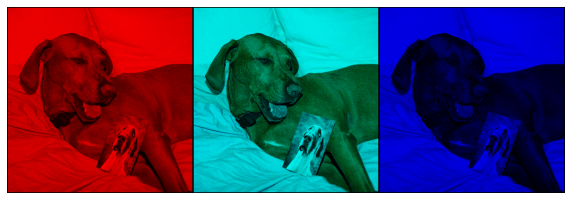

In [46]:
plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize=(10, 4))
plt.set_cmap('hot')
plt.axis('off')
plt.imshow(plot_image)

## Gray Scale Pixel Distribution

In [48]:
!conda list scikit-image

# packages in environment at C:\ProgramData\Anaconda3\envs\cvtf2:
#
# Name                    Version                   Build  Channel
scikit-image              0.17.2           py37h1e1f486_0  


In [54]:
from skimage.color import rgb2gray
dog_img_gray = rgb2gray(dog_image)
print('Image shape: ', dog_img_gray.shape, '\n')

print('2D image pixel map')
print(np.round(dog_img_gray, 2), '\n')

print('Flattend pixel map:', (np.round(dog_img_gray.flatten(), 2)))

Image shape:  (500, 500) 

2D image pixel map
[[0.   0.1  0.   ... 0.   0.04 0.03]
 [0.   0.04 0.06 ... 0.06 0.   0.03]
 [0.   0.11 0.65 ... 0.62 0.04 0.  ]
 ...
 [0.   0.03 0.53 ... 0.07 0.02 0.  ]
 [0.06 0.   0.08 ... 0.01 0.   0.  ]
 [0.   0.01 0.   ... 0.   0.01 0.02]] 

Flattend pixel map: [0.   0.1  0.   ... 0.   0.01 0.02]


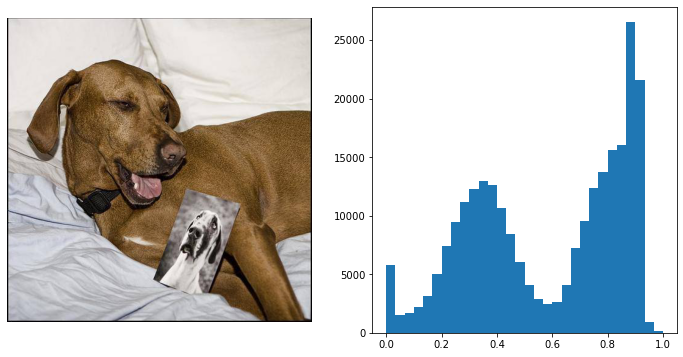

In [55]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1)
plt.set_cmap('hot')
plt.axis('off')
ax1.imshow(dog_image, cmap='gray')
ax2 = fig.add_subplot(1,2,2)
c_freq, c_bins, c_patches = ax2.hist(dog_img_gray.flatten(), bins=30)

## Edge Detection

C:\ProgramData\Anaconda3\envs\cvtf2\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


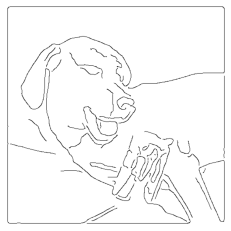

In [56]:
from skimage.feature import canny
import sys

dog_edges = canny(dog_img_gray, sigma=3)
fig = plt.figure(figsize=(8, 4))
plt.set_cmap('hot')
plt.axis('off')
ax2 = fig.add_subplot(1,1,1)
ax2.imshow(dog_edges, cmap='binary')

## Deep Learning based Feature Extraction

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras import backend as K

In [58]:
dog_image.shape

(500, 500, 3)

In [60]:
# Setup a very basic 2 Layer CNN
model = Sequential()
model.add(Conv2D(4, (4, 4), input_shape=(500, 500, 3), activation='relu',
                kernel_initializer='glorot_uniform'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(4, (4, 4), activation='relu', kernel_initializer='glorot_uniform'))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 497, 497, 4)       196       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 248, 248, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 245, 245, 4)       260       
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Hooks to extract features from layers
# first_conv_layer = K.function([model.layers[0].input, K.learning_phase()],
#                              [model.layers[0].output])
first_conv_layer = Model(model.layers[0].input, model.layers[0].output)
second_conv_layer = Model(model.layers[0].input, model.layers[2].output)

In [65]:
dog_vec = dog_image.reshape(1, 500, 500, 3)

In [73]:
first_conv_features = first_conv_layer([dog_vec])[0]

In [74]:
second_conv_features = second_conv_layer([dog_vec])[0]

In [75]:
first_conv_features.shape

TensorShape([497, 497, 4])

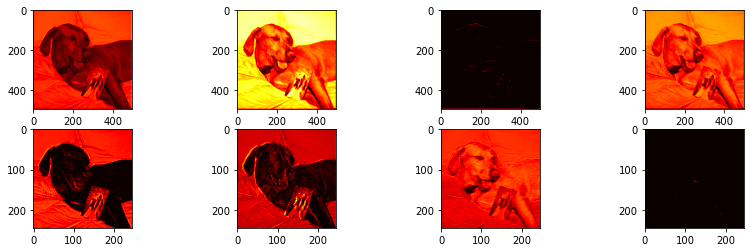

In [76]:
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(2, 4, 1)
ax1.imshow(first_conv_features[:,:,0])
ax2 = fig.add_subplot(2, 4, 2)
ax2.imshow(first_conv_features[:,:,1])
ax3 = fig.add_subplot(2, 4, 3)
ax3.imshow(first_conv_features[:,:,2])
ax4 = fig.add_subplot(2, 4, 4)
ax4.imshow(first_conv_features[:,:,3])

ax5 = fig.add_subplot(2, 4, 5)
ax5.imshow(second_conv_features[:,:,0])
ax6 = fig.add_subplot(2, 4, 6)
ax6.imshow(second_conv_features[:,:,1])
ax7 = fig.add_subplot(2, 4, 7)
ax7.imshow(second_conv_features[:,:,2])
ax8 = fig.add_subplot(2, 4, 8)
ax8.imshow(second_conv_features[:,:,3])